# **Team INSIGHT CREW**

1. Devang choudhary - 202418016
2. Priyanshi saini  - 202418002
3. Nupoor Londhe    - 202418040
4. Yash Deshmukh    - 202418063




In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Pre-processing ##

In [4]:
# Reading the data through CSV file.
data = pd.read_csv('/content/005380KS.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,147500.0,148000.0,143500.0,144000.0,110097.875000,445332
1,2016-01-05,143000.0,145000.0,142000.0,143500.0,109715.578125,530496
2,2016-01-06,144000.0,145000.0,139000.0,140000.0,107039.593750,769406
3,2016-01-07,138500.0,140000.0,137500.0,137500.0,105128.164062,586187
4,2016-01-08,134500.0,138000.0,133500.0,136500.0,104363.609375,888701


In [5]:
data.shape

(2118, 7)

In [6]:
data = data.drop(columns=['Adj Close'])
print(data)

            Date      Open      High       Low     Close   Volume
0     2016-01-04  147500.0  148000.0  143500.0  144000.0   445332
1     2016-01-05  143000.0  145000.0  142000.0  143500.0   530496
2     2016-01-06  144000.0  145000.0  139000.0  140000.0   769406
3     2016-01-07  138500.0  140000.0  137500.0  137500.0   586187
4     2016-01-08  134500.0  138000.0  133500.0  136500.0   888701
...          ...       ...       ...       ...       ...      ...
2113  2024-08-12  246000.0  249000.0  242000.0  243500.0   469844
2114  2024-08-13  242000.0  245500.0  240000.0  243000.0   358474
2115  2024-08-14  245500.0  248000.0  238500.0  241000.0   500276
2116  2024-08-16  248000.0  256500.0  246500.0  255000.0  1113073
2117  2024-08-19  256000.0  259500.0  250000.0  255000.0   739313

[2118 rows x 6 columns]


In [7]:
# To check for duplicate entities.
data.duplicated().sum().any()

False

In [8]:
# To check null values.
data.isnull().values.any()

False

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2118 entries, 0 to 2117
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2118 non-null   object 
 1   Open    2118 non-null   float64
 2   High    2118 non-null   float64
 3   Low     2118 non-null   float64
 4   Close   2118 non-null   float64
 5   Volume  2118 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 99.4+ KB


In [10]:
# To get Statistical Interpretation.
data.describe()

,Open,High,Low,Close,Volume
count,2118.000000,2118.000000,2118.000000,2118.000000,2.118000e+03
mean,166098.111426,168294.948064,163998.064212,166100.849858,8.584012e+05
std,41902.890256,42551.646665,41281.009541,41821.206244,9.460787e+05
min,67200.000000,71000.000000,65000.000000,65900.000000,0.000000e+00
25%,134000.000000,135500.000000,132500.000000,134000.000000,4.250140e+05
50%,158000.000000,160500.000000,156000.000000,158500.000000,5.971490e+05
75%,191475.000000,193500.000000,189575.000000,191975.000000,9.337368e+05
max,299500.000000,299500.000000,293000.000000,298000.000000,1.993370e+07


In [11]:
# Conversion of Datatype
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
# Representation of Correlation between the given attributes.
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

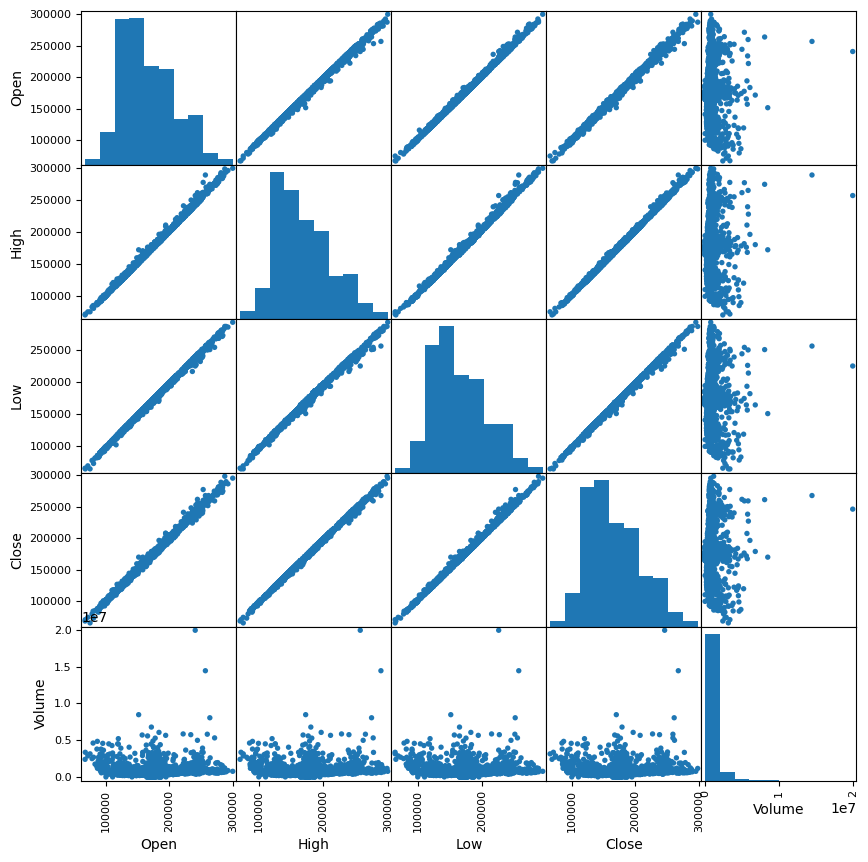

In [13]:
# Plotting of Scatter plot matrix.
g = pd.plotting.scatter_matrix(data, figsize=(10,10), marker = '.', hist_kwds = {'bins': 10}, s = 60, alpha = 1)
plt.show()

In [14]:
# Representation of Stock Market Data in Candlestick pattern.
import plotly.graph_objects as pgo
figure = pgo.Figure(data=[pgo.Candlestick(x=data['Date'], open=data['Open'], high=data['High'], low=data['Low'], close=data['Close'])])
figure.update_layout(title='Stock Price Predictor', xaxis_rangeslider_visible=False)
figure.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [78]:
# Separating attribute and prediction value.
X= data[['Open','High','Low','Volume']].values
Y= data['Close'].values

In [79]:
# Creating training, validation and testing set.
from sklearn.model_selection import train_test_split
X_train, X_temp, Y_train, Y_temp = train_test_split(X,Y, test_size=0.2, random_state=0)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp,Y_temp, test_size=0.5, random_state=0)

In [80]:
print('Train:', X_train.shape)
print('Val:', X_val.shape)
print('Test:', X_test.shape)

Train: (1694, 4)
Val: (212, 4)
Test: (212, 4)


In [81]:
# Combining Training and Validation set.
X_combined = np.concatenate((X_train, X_val), axis=0)
Y_combined = np.concatenate((Y_train, Y_val), axis=0)

In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_val_scaler = scaler.transform(X_val)
X_test_scaler = scaler.transform(X_test)
X_combined_scaler = scaler.fit_transform(X_combined)

## Model for LinearRegression ##

In [20]:
#Importing Linear Regression Model from Sklearn.
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
model=lr.fit(X_train_scaler, Y_train)
Y_pred= lr.predict(X_val_scaler)

In [21]:
Y_pred.shape

(212,)

In [22]:
#Printing model parameters.
print("Model Coefficient:", lr.coef_)
print("Model Intercept:", lr.intercept_)

Model Coefficient: [-20893.90620282  34201.3034295   28637.56049873   -128.40100593]
Model Intercept: 165866.29279811098


In [23]:
df=pd.DataFrame({'Actual Price':Y_val,'Predicted Price':Y_pred})
print(df)

     Actual Price  Predicted Price
0        122500.0    123634.576729
1        186200.0    186860.761321
2        179300.0    178383.792238
3         87200.0     86892.332071
4        161500.0    160379.609051
..            ...              ...
207      146000.0    146443.432039
208      133000.0    134419.718551
209      147000.0    147133.537615
210      233000.0    234033.546376
211      138000.0    137467.590480

[212 rows x 2 columns]


In [24]:
df.describe()

,Actual Price,Predicted Price
count,212.000000,212.000000
mean,167262.735849,167235.765298
std,41295.921767,41220.280760
min,87200.000000,86892.332071
25%,135875.000000,136715.592866
50%,161500.000000,160424.105390
75%,194625.000000,194354.283489
max,265500.000000,266136.737523


In [25]:
#Checking Metrics on Validation Set.
import math
from sklearn.metrics import max_error,r2_score,mean_absolute_error,mean_squared_error,PredictionErrorDisplay
mae= mean_absolute_error(Y_val,Y_pred)
mse= mean_squared_error(Y_val,Y_pred)
rmse= math.sqrt(mse)
print("Maximum Error:", max_error(Y_val,Y_pred))
print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("Root Mean Squared Error:",rmse)
print("R2 Score:", r2_score(Y_val,Y_pred))

Maximum Error: 6680.134610511363
Mean Absolute Error: 968.237194522782
Mean Squared Error: 1744223.1173752672
Root Mean Squared Error: 1320.6903942163233
R2 Score: 0.9989723597291529


In [26]:
x1=abs(Y_pred-Y_val)
y1=100*(x1/Y_val)
accuracy= 100-np.mean(y1)
print('MAE based Accuracy', round(accuracy,2),'%.')

Accuracy 99.42 %.


In [27]:
#To check for model hyperparameters.
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [28]:
param_grid = {'copy_X': [True,False], 'fit_intercept': [True,False], 'positive' : [True,False]}

In [29]:
#Searching for the Best Model HyperParameters.
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(model,param_grid, cv=5)
clf.fit(X_train_scaler, Y_train)
clf.cv_results_

{'mean_fit_time': array([0.00512066, 0.00158854, 0.00166674, 0.00175719, 0.00191169,
        0.00139952, 0.00197163, 0.00121384]),
 'std_fit_time': array([3.04159133e-03, 2.92923880e-04, 2.45307040e-04, 1.03960553e-03,
        2.00537630e-04, 7.67898832e-05, 6.75941835e-04, 3.69213013e-05]),
 'mean_score_time': array([0.00227213, 0.0010263 , 0.00093088, 0.00100718, 0.00094914,
        0.00100951, 0.00094662, 0.00098119]),
 'std_score_time': array([1.54027977e-03, 3.36434213e-05, 5.10827260e-05, 5.97892953e-05,
        2.99174944e-05, 3.22065997e-05, 3.18170822e-05, 2.12203786e-05]),
 'param_copy_X': masked_array(data=[True, True, True, True, False, False, False, False],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_fit_intercept': masked_array(data=[True, True, False, False, True, True, False, False],
              mask=[False, False, False, False, False, False, False, False],
        fill_value=

In [30]:
df = pd.DataFrame(clf.cv_results_)
df[['param_copy_X','param_fit_intercept','param_positive','mean_test_score']]

,param_copy_X,param_fit_intercept,param_positive,mean_test_score
0,True,True,True,0.998601
1,True,True,False,0.998982
2,True,False,True,-14.694283
3,True,False,False,-14.786521
4,False,True,True,0.998601
5,False,True,False,0.998982
6,False,False,True,-14.694283
7,False,False,False,-14.786521


In [31]:
#Filtering out the best hyperparameters.
clf.best_params_

{'copy_X': True, 'fit_intercept': True, 'positive': False}

In [32]:
#Training a model with best hyperparameters on merged data of train And validation dataset.
model1 = lr.fit(X_combined_scaler, Y_combined)
Y_pred1 = lr.predict(X_test_scaler)

In [33]:
#Evaluating Metrics on test set.
mae= mean_absolute_error(Y_test,Y_pred1)
mse= mean_squared_error(Y_test,Y_pred1)
rmse= math.sqrt(mse)
print("Maximum Error:", max_error(Y_test,Y_pred1))
print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("Root Mean Squared Error:",rmse)
print("R2 Score:", r2_score(Y_test,Y_pred1))

Maximum Error: 6717.509967359947
Mean Absolute Error: 879.5029612566128
Mean Squared Error: 1534642.6480101026
Root Mean Squared Error: 1238.8069454156698
R2 Score: 0.9991004546367497


In [34]:
x1=abs(Y_pred1-Y_test)
y1=100*(x1/Y_test)
accuracy= 100-np.mean(y1)
print('MAE based Accuracy', round(accuracy,2),'%.')

Accuracy 99.46 %.


# **Pseudocode for Linear Regression:**

1. Importing LinearRegression Model from sklearn and fitting it on training data.

2. Predicting the stock price for the  validation set.

3. Checking metrics and performance for the model on the validation set.

4. Tuning the model for its best Hyperparameters using GridSearchCV.

5. Training the final model with best hyperparameters by fitting it on combined(Train+Val) dataset.

6. Predicting the stock price for the test set.

7. Checking metrics and performance for the model on the test set.

## Model for RandomForestRegressor ##

In [35]:
#Importing Random Forest Regression Model from Sklearn.
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
model2= rfr.fit(X_train_scaler, Y_train)
Y_pred2= rfr.predict(X_val_scaler)

In [36]:
Y_pred2.shape

(212,)

In [37]:
#Printing feature values.
print("Feature Importance:", rfr.feature_importances_)

Feature Importance: [2.34632120e-02 4.37430323e-01 5.38802694e-01 3.03770985e-04]


In [38]:
df2=pd.DataFrame({'Actual Price':Y_val,'Predicted Price':Y_pred2})
print(df2)

     Actual Price  Predicted Price
0        122500.0         123020.0
1        186200.0         186293.0
2        179300.0         176729.0
3         87200.0          84806.0
4        161500.0         161055.0
..            ...              ...
207      146000.0         145975.0
208      133000.0         135005.0
209      147000.0         148120.0
210      233000.0         234270.0
211      138000.0         137485.0

[212 rows x 2 columns]


In [39]:
#Checking Metrics on Validation Set.
mae= mean_absolute_error(Y_val,Y_pred2)
mse= mean_squared_error(Y_val,Y_pred2)
rmse= math.sqrt(mse)
print("Maximum Error:", max_error(Y_val,Y_pred2))
print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("Root Mean Squared Error:",rmse)
print("R2 Score:", r2_score(Y_val,Y_pred2))

Maximum Error: 7815.0
Mean Absolute Error: 1071.6084905660377
Mean Squared Error: 2273596.2594339624
Root Mean Squared Error: 1507.8449056298737
R2 Score: 0.9986604700668354


In [40]:
x1=abs(Y_pred2-Y_val)
y1=100*(x1/Y_val)
accuracy= 100-np.mean(y1)
print('MAE based Accuracy', round(accuracy,2),'%.')

Accuracy 99.36 %.


In [41]:
#To check for model hyperparameters.
model2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [42]:
param_grid = {
'n_estimators': [50, 100, 200, 300],
'min_samples_leaf': [1, 5, 10],
'max_depth': [2, 4, 6, 8, 10],
'max_features': ['log2', 'sqrt'],
'bootstrap': [True, False]}

In [43]:
#Searching for the Best Model HyperParameters.
clf = GridSearchCV(model2,param_grid, cv=5, error_score='raise')
clf.fit(X_train_scaler, Y_train)
clf.cv_results_

{'mean_fit_time': array([0.18247867, 0.52132368, 0.82622013, 0.85754938, 0.08339782,
        0.16250901, 0.3245316 , 0.71169767, 0.07955184, 0.16214542,
        0.32381482, 0.48463268, 0.08087816, 0.160467  , 0.31950564,
        0.59440837, 0.12620173, 0.23529758, 0.32151446, 0.47986879,
        0.08036265, 0.16134262, 0.31945391, 0.96497564, 0.15188065,
        0.23454823, 0.39689951, 0.58332124, 0.09653893, 0.19369817,
        0.39306655, 0.81972947, 0.09803948, 0.19502015, 0.39377646,
        0.58227806, 0.09782901, 0.19702902, 0.41579199, 0.76119914,
        0.09856477, 0.19382973, 0.38509359, 0.58199067, 0.10096855,
        0.19623036, 0.51914563, 0.68701587, 0.1133215 , 0.22881789,
        0.45641055, 0.69454622, 0.15128822, 0.3424736 , 0.58736911,
        0.80446916, 0.10980511, 0.22258224, 1.0927556 , 1.9238266 ,
        0.18697286, 0.30806303, 0.61304364, 0.69483476, 0.11210165,
        0.2281805 , 0.45163498, 1.25244846, 0.22162833, 0.34067321,
        0.71678319, 1.2674499 ,

In [44]:
#Filtering out the best hyperparameters.
clf.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'n_estimators': 50}

In [45]:
#Training a model with best hyperparameters on merged data of train And validation dataset.
rfr = RandomForestRegressor( bootstrap = True,
 max_depth = 10,
 max_features = 'sqrt',
 min_samples_leaf = 1,
 n_estimators = 100 )

model3= rfr.fit(X_combined_scaler, Y_combined)
Y_pred3= rfr.predict(X_test_scaler)

In [46]:
print("Feature Importance:", rfr.feature_importances_)

Feature Importance: [0.18540294 0.41152803 0.40265411 0.00041493]


In [47]:
df3 =pd.DataFrame({'Actual Price':Y_test,'Predicted Price':Y_pred3})
print(df3)

     Actual Price  Predicted Price
0        283000.0    282800.000000
1        183000.0    182194.759727
2        128000.0    128103.795798
3        197500.0    196670.036448
4        141000.0    139966.083076
..            ...              ...
207      182500.0    180010.696881
208      124500.0    125146.551618
209       98500.0     99498.950649
210      118500.0    121827.943175
211      159500.0    159121.034097

[212 rows x 2 columns]


In [48]:
#Evaluating Metrics on test set.
mse = mean_squared_error(Y_test,Y_pred3)
mae = mean_absolute_error(Y_test,Y_pred3)
rmse = math.sqrt(mse)
print("Maximum Error:", max_error(Y_test,Y_pred3))
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2_score(Y_test,Y_pred3))

Maximum Error: 6253.3786630036775
Mean Squared Error: 2331697.1041785195
Mean Absolute Error: 1106.0452003917414
Root Mean Squared Error: 1526.9895560148798
R2 Score: 0.9986332535973195


In [49]:
x1=abs(Y_pred3-Y_test)
y1=100*(x1/Y_test)
accuracy= 100-np.mean(y1)
print('MAE based Accuracy', round(accuracy,2),'%.')

Accuracy 99.31 %.


# **Pseudocode for  RandomForestRegression:**

1. Importing RandomForestRegression Model from sklearn and fitting it on training data.

2. Predicting the stock price for the  validation set.

3. Checking metrics and performance for the model on the validation set.

4. Tuning the model for its best Hyperparameters using GridSearchCV.

5. Training the final model with best hyperparameters by fitting it on combined(Train+Val) dataset.

6. Predicting the stock price for the test set.

7. Checking metrics and performance for the model on the test set.

## Model for GradientBoostingRegressor ##

In [50]:
#Importing Gradient Boosting Regression Model from Sklearn.
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
model4 = gbr.fit(X_train_scaler,Y_train)
Y_pred4 = gbr.predict(X_val_scaler)

In [51]:
#Printing feature values.
print("Feature Importance:", gbr.feature_importances_)

Feature Importance: [3.28362096e-04 4.59252731e-01 5.40331702e-01 8.72049530e-05]


In [52]:
df4 =pd.DataFrame({'Actual Price':Y_val,'Predicted Price':Y_pred4})
print(df4)

     Actual Price  Predicted Price
0        122500.0    123196.326237
1        186200.0    186318.489567
2        179300.0    176742.332325
3         87200.0     87133.485150
4        161500.0    160672.955076
..            ...              ...
207      146000.0    145582.158914
208      133000.0    135403.752066
209      147000.0    147630.168166
210      233000.0    235374.585687
211      138000.0    137031.643232

[212 rows x 2 columns]


In [53]:
#Checking Metrics on Validation Set.
mse = mean_squared_error(Y_val,Y_pred4)
mae = mean_absolute_error(Y_val,Y_pred4)
rmse = math.sqrt(mse)
print("Maximum Error:", max_error(Y_val,Y_pred4))
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2_score(Y_val,Y_pred4))

Maximum Error: 8446.353765534848
Mean Squared Error: 2488173.746599612
Mean Absolute Error: 1155.1862214424675
Root Mean Squared Error: 1577.3946071289872
R2 Score: 0.9985340478993776


In [54]:
x1=abs(Y_pred4-Y_val)
y1=100*(x1/Y_val)
accuracy= 100-np.mean(y1)
print('MAE based Accuracy', round(accuracy,2),'%.')

Accuracy 99.3 %.


In [55]:
#Training a model with best hyperparameters on merged data of train And validation dataset.
model5 = gbr.fit(X_combined_scaler, Y_combined)
Y_pred5 = gbr.predict(X_test_scaler)

In [56]:
print("Feature Importance:", gbr.feature_importances_)

Feature Importance: [3.63444653e-04 5.45976866e-01 4.53582901e-01 7.67887363e-05]


In [57]:
df5 =pd.DataFrame({'Actual Price':Y_test,'Predicted Price':Y_pred5})
print(df5)

     Actual Price  Predicted Price
0        283000.0    280341.439936
1        183000.0    181764.878326
2        128000.0    127696.782265
3        197500.0    196727.719389
4        141000.0    139824.887212
..            ...              ...
207      182500.0    179942.641659
208      124500.0    125155.817743
209       98500.0     99872.565799
210      118500.0    121980.944335
211      159500.0    158672.336461

[212 rows x 2 columns]


In [58]:
#Evaluating Metrics on test set.
mse = mean_squared_error(Y_test,Y_pred5)
mae = mean_absolute_error(Y_test,Y_pred5)
rmse = math.sqrt(mse)
print("Maximum Error:", max_error(Y_test,Y_pred5))
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2_score(Y_test,Y_pred5))

Maximum Error: 5299.446716888604
Mean Squared Error: 2538494.6308006556
Mean Absolute Error: 1209.3782218708998
Root Mean Squared Error: 1593.2653987332606
R2 Score: 0.9985120372630505


In [59]:
x1=abs(Y_pred5-Y_test)
y1=100*(x1/Y_test)
accuracy= 100-np.mean(y1)
print('MAE based Accuracy', round(accuracy,2),'%.')

Accuracy 99.24 %.


# **Pseudocode for GradientBoostingRegression:**

1. Importing GradientBoostiingRegression Model from sklearn and fitting it on training data.

2. Predicting the stock price for the  validation set.

3. Checking metrics and performance for the model on the validation set.

4. Training the final model by fitting it on combined(Train+Val) dataset.

5. Predicting the stock price for the test set.

6. Checking metrics and performance for the model on the test set.

## Model for PolynomialRegression ##

In [60]:
#Importing Polynomial Regression Model from Sklearn.
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaler)
X_val_poly = poly.transform(X_val_scaler)
X_train_poly.shape
X_val_poly.shape

(212, 15)

In [61]:
poly.fit(X_train_poly, Y_train)
lr.fit(X_train_poly, Y_train)
Y_pred6 = lr.predict(X_val_poly)

In [62]:
#Checking Metrics on Validation Set.
mse = mean_squared_error(Y_val,Y_pred6)
mae = mean_absolute_error(Y_val,Y_pred6)
rmse = math.sqrt(mse)
print("Maximum Error:", max_error(Y_val,Y_pred6))
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2_score(Y_val,Y_pred6))

Maximum Error: 6319.005983531126
Mean Squared Error: 1634025.1942709226
Mean Absolute Error: 929.0707015155784
Root Mean Squared Error: 1278.2899492176737
R2 Score: 0.9990372848080706


In [63]:
x1=abs(Y_pred6-Y_val)
y1=100*(x1/Y_val)
accuracy= 100-np.mean(y1)
print('MAE based Accuracy', round(accuracy,2),'%.')

Accuracy 99.44 %.


In [64]:
X_combined_poly = poly.fit_transform(X_combined_scaler)
X_test_poly = poly.transform(X_test_scaler)
X_combined_poly.shape
X_test_poly.shape

(212, 15)

In [65]:
#Training a model with best hyperparameters on merged data of train And validation dataset.
poly.fit(X_combined_poly, Y_combined)
lr.fit(X_combined_poly, Y_combined)
Y_pred7= lr.predict(X_test_poly)

In [66]:
#Evaluating Metrics on test set.
mse = mean_squared_error(Y_test,Y_pred7)
mae = mean_absolute_error(Y_test,Y_pred7)
rmse = math.sqrt(mse)
print("Maximum Error:", max_error(Y_test,Y_pred7))
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2_score(Y_test,Y_pred7))

Maximum Error: 5801.282502476533
Mean Squared Error: 1398557.5906294417
Mean Absolute Error: 842.5292929712746
Root Mean Squared Error: 1182.6062703323712
R2 Score: 0.9991802221855879


In [67]:
x1=abs(Y_pred7-Y_test)
y1=100*(x1/Y_test)
accuracy= 100-np.mean(y1)
print('MAE based Accuracy', round(accuracy,2),'%.')

Accuracy 99.49 %.


# **Pseudocode for Polynomial Regression:**

1. Importing Polynomial Features and Standard Scaler Module from sklearn.

2. Scaling the Attribute Data(X) and then fitting the polynomial feature on it.

3. Training the model on Polyfit data by using LinearRegression.

4. Predicting the stock price for the  validation set.

5. Checking metrics and performance for the model on the validation set.

6. Tuning the model for its best Hyperparameters using Manual Search.

7. Training the final model with best hyperparameters by fitting it on combined(Train+Val) dataset.

8. Predicting the stock price for the test set.

9. Checking metrics and performance for the model on the test set.

## **Pipeline Based Models:**

In [68]:
#Importing Pipeline module and Ridge, Lasso and ElasticNet Regression.
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.exceptions import NotFittedError

In [69]:
pipelines = {
    'lr':make_pipeline(LinearRegression()),
    'rfr':make_pipeline(RandomForestRegressor()),
    'gbr':make_pipeline(GradientBoostingRegressor()),
    'poly':make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    'ridge':make_pipeline(Ridge()),
    'lasso':make_pipeline(Lasso()),
    'elasticnet':make_pipeline(ElasticNet())
}

In [92]:
Lasso().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [93]:
Ridge().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [94]:
ElasticNet().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [87]:
param_grid = {
    'lr':{
        'linearregression__copy_X': [True,False],
        'linearregression__fit_intercept': [True,False],
        'linearregression__positive' : [True,False]
    },
    'rfr':{
        'randomforestregressor__n_estimators': [50, 100, 200, 300],
        'randomforestregressor__min_samples_leaf': [1, 5, 10],
        'randomforestregressor__max_depth': [2, 4, 6, 8, 10],
        'randomforestregressor__max_features': ['log2', 'sqrt'],
        'randomforestregressor__bootstrap': [True, False]
    },
    'gbr':{
        'gradientboostingregressor__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'poly':{
        'polynomialfeatures__degree':[2, 3, 4, 5, 6, 7, 8]
    },
    'ridge':{
        'ridge__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99],
        'ridge__fit_intercept':[True, False],
        'ridge__copy_X':[True, False],
        'ridge__positive':[True, False],
        'ridge__max_iter':[1000, 2000, 3000, 4000, 5000],
        'ridge__tol':[1e+8, 2e+8, 3e+8, 4e+8, 5e+8],
    },
    'lasso':{
        'lasso__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99],
        'lasso__fit_intercept':[True, False],
        'lasso__copy_X':[True, False],
        'lasso__positive':[True, False],
        'lasso__max_iter':[1000, 2000, 3000, 4000, 5000],
        'lasso__tol':[1e+8, 2e+8, 3e+8, 4e+8, 5e+8],
    },
    'elasticnet':{
        'elasticnet__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99],
        'elasticnet__fit_intercept':[True, False],
        'elasticnet__copy_X':[True, False],
        'elasticnet__positive':[True, False],
        'elasticnet__max_iter':[1000, 2000, 3000, 4000, 5000],
        'elasticnet__tol':[1e+8, 2e+8, 3e+8, 4e+8, 5e+8],
        'elasticnet__l1_ratio':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    }
}

In [88]:
#Fitting model added in the pipeline on Training Set.
fit_models = {}

for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, param_grid[algo], cv=5, n_jobs=-1, error_score='raise')
    try:
        print(f'Starting training for {algo}.')
        model.fit(X_train_scaler, Y_train)
        fit_models[algo] = model
        print(f'{algo} has been successfully fit.')
    except NotFittedError as e:
        print(repr(e))

Starting training for lr.
lr has been successfully fit.
Starting training for rfr.
rfr has been successfully fit.
Starting training for gbr.
gbr has been successfully fit.
Starting training for poly.
poly has been successfully fit.
Starting training for ridge.
ridge has been successfully fit.
Starting training for lasso.
lasso has been successfully fit.
Starting training for elasticnet.
elasticnet has been successfully fit.


In [89]:
#Checking Metrics on Validation Set.
for algo,model in fit_models.items():
    ypred = model.predict(X_val_scaler)
    print(f'{algo} scores - R2:{r2_score(Y_val,ypred)} MAE:{mean_absolute_error(Y_val,ypred)} MSE:{mean_squared_error(Y_val,ypred)} RMSE:{math.sqrt(mean_squared_error(Y_val,ypred))} Max Error:{max_error(Y_val,ypred)}')

lr scores - R2:0.9989723597291529 MAE:968.237194522782 MSE:1744223.1173752672 RMSE:1320.6903942163233 Max Error:6680.134610511363
rfr scores - R2:0.9985537779219615 MAE:1114.2570577725792 MSE:2454685.8009892004 RMSE:1566.7436934576122 Max Error:7922.523809523846
gbr scores - R2:0.9985240987148685 MAE:1158.245913152538 MSE:2505060.5873668673 RMSE:1582.7383192956654 Max Error:8446.353765534848
poly scores - R2:0.9990372848080706 MAE:929.0707015155784 MSE:1634025.1942709226 RMSE:1278.2899492176737 Max Error:6319.005983531126
ridge scores - R2:0.9989680180781578 MAE:970.3383992143814 MSE:1751592.2408398937 RMSE:1323.4773291748875 Max Error:6637.155985231482
lasso scores - R2:0.9949115639264178 MAE:2021.0899978279313 MSE:8636648.526348328 RMSE:2938.817538798271 Max Error:13768.146457849507
elasticnet scores - R2:0.9958195317808818 MAE:1840.1415761258559 MSE:7095546.482649659 RMSE:2663.746700166827 Max Error:12478.780587431276


In [90]:
#Fitting model added in the pipeline on Combined Set.
fit_models1 = {}

for algo, pipeline in pipelines.items():
    model1 = GridSearchCV(pipeline, param_grid[algo], cv=5, n_jobs=-1, error_score='raise')
    try:
        print(f'Starting training for {algo}.')
        model1.fit(X_combined_scaler, Y_combined)
        fit_models1[algo] = model
        print(f'{algo} has been successfully fit.')
    except NotFittedError as e:
        print(repr(e))

Starting training for lr.
lr has been successfully fit.
Starting training for rfr.
rfr has been successfully fit.
Starting training for gbr.
gbr has been successfully fit.
Starting training for poly.
poly has been successfully fit.
Starting training for ridge.
ridge has been successfully fit.
Starting training for lasso.
lasso has been successfully fit.
Starting training for elasticnet.
elasticnet has been successfully fit.


In [91]:
#Checking Metrics on Test Set.
for algo,model in fit_models.items():
    ypred = model.predict(X_test_scaler)
    print(f'{algo} scores - R2:{r2_score(Y_test,ypred)} MAE:{mean_absolute_error(Y_test,ypred)} MSE:{mean_squared_error(Y_test,ypred)} RMSE:{math.sqrt(mean_squared_error(Y_test,ypred))} Max Error:{max_error(Y_test,ypred)}')

lr scores - R2:0.9990978354726328 MAE:881.1211962576265 MSE:1539110.9951554886 RMSE:1240.6091226310923 Max Error:6743.860058701597
rfr scores - R2:0.9985715091987158 MAE:1105.781384604704 MSE:2437034.301438186 RMSE:1561.100349573398 Max Error:7112.0
gbr scores - R2:0.9985379360422918 MAE:1220.497422877281 MSE:2494310.787740786 RMSE:1579.338718496063 Max Error:5678.440474044532
poly scores - R2:0.9991821768699416 MAE:841.6211637054009 MSE:1395222.8594473226 RMSE:1181.1955212611172 Max Error:5840.989367971546
ridge scores - R2:0.9990971656860548 MAE:885.5584986359714 MSE:1540253.6646522281 RMSE:1241.0695647916873 Max Error:6696.484679605404
lasso scores - R2:0.9951771293006324 MAE:2099.8201352572432 MSE:8227915.304175897 RMSE:2868.4342949030392 Max Error:11521.043799808947
elasticnet scores - R2:0.9961467735357764 MAE:1889.3190855924738 MSE:6573682.557900157 RMSE:2563.919374297904 Max Error:10177.673507051484


## **Documentation:**


## **Hyundai Stock Price Prediction using Machine Learning**

This project involves predicting Hyundai stock prices using various machine learning models: **Linear Regression, Random Forest Regressor, Gradient Boosting Regressor, Polynomial Regression, Ridge Regression, Lasso Regression and ElasticNet Regression**. Below is a description of the process followed for each model, including data preparation, model training, evaluation, and performance metrics.

---




# 1.   **Libraries and Dependencies**


The following libraries were used throughout the project:

*   *Data Manipulation & Analysis:*    pandas, numpy.
*   *Visualization:*     matplotlib.pyplot, plotly.graph_objects.
*   *Pipeline modeling:* sklearn.pipeline.
*   *Machine Learning Models:* Linear Regression, Random Forest Regressor, Gradient Boosting Regressor, Polynomial Features, Ridge Regression, Lasso Regression, ElasticNet Regression.
*   *Metrics:* mean_absolute_error, mean_squared_error, r2_score, max_error.
*   *Hyperparameter Tunning:* GridSearchCV
*   *Additional Utilities:* math, sklearn.exceptions, sklearn.model_selection.

---

# 2.   **Data Preparation**


*   *Data Loading:* The stock price data was loaded from a CSV file into a pandas DataFrame.
*   *Cleaning:* Unnecessary columns like 'Adj Close' were dropped, and checks for duplicates and missing values were conducted.
*   *Feature Selection:* The features used for prediction were ['Open','High','Low','Volume'] prices while the target variable was the ['Close'] price.
*   *Train-Validation-Test Split:* The dataset was split into training (80%) ,validation (10% ) and testing (10%) sets. The training set was further split into training and validation sets for model evaluation and tuning.
*   *Feature Scaling:* Used StandardScaler() to scale features.

---



# 3.   **Models and Techniques**

*   *Model Initialization:* LinearRegression(), RandomForestRegressor(), GradientBoostingRegresssor(), PolynomialFeatures(), RidgeRegression(), LassoRegression(), ElasticNetRegression() from sklearn in the pipeline or separately.
*   *Transformation:* For Polynomial fitting we transformed the data set into Polynomial Features.
*   *Model Training:* Trained the model on the dataset.
*   *Validation:* Predicting values and then checking metrics on validation set.
*   *Final Model Training and Testing:* Retrained the model by tuning hyperparameter and testing it on test set.

---




# 4.	**Model Performance Metrics**

For all models, the following metrics were calculated:

*   Mean Absolute Error (MAE)
*   Mean Squared Error (MSE)
*   Root Mean Squared Error (RMSE)
*   R-squared Score (r2_score)
*   Maximum Error (max_error)


---

# 5.	**Conclusion**

Results showed that Polynomial Regression achieved the lowest error metrics among the models, demonstrating the highest accuracy in predicting stock prices. This was followed by Linear Regression and Ridge Regression, which also performed well but did not match the scores of Polynomial regression. Overall, the polynomial model provided the most accurate predictions, highlighting its superior performance in this analysis.


---

# 6.	**Novelty**


*   Tried to estimate  the accuracy based on the MAE as regression model doesn’t have a direct accuracy parameter usually we compare r2 score for selecting the model performance.


---


# 7.  **Citing**


*   The raw data set used in the model is sourced from www.kaggle.com link for the same is provided:
"https://www.kaggle.com/datasets/caesarmario/hyundai-motor-company-stock-historical-price"
*   Additional reference from the ‘ Machine learning with python cookbook ‘ is credited in this model.
*   Documentations reference has  also contributed largely.
















